Dataset:https://machinelearningmastery.com/time-series-datasets-for-machine-learning/

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
import seaborn as sns

In [2]:
df= pd.read_csv("sunspots.csv")
df.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


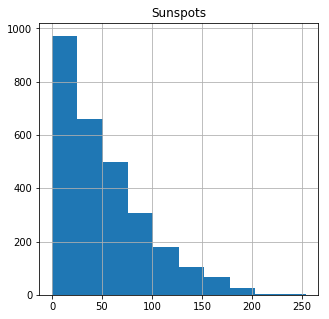

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


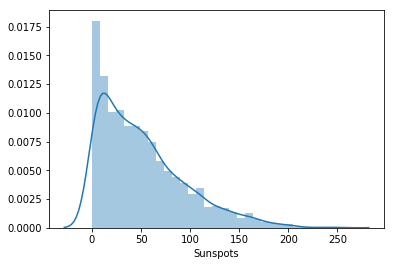

In [3]:
df.hist(figsize=(5,5))
plt.show()
sns.distplot(df['Sunspots'])

In [4]:
df.describe()

,Sunspots
count,2820.000000
mean,51.265957
std,43.448971
min,0.000000
25%,15.700000
50%,42.000000
75%,74.925000
max,253.800000


In [5]:
df.tail()

,Month,Sunspots
2815,1983-08,71.8
2816,1983-09,50.3
2817,1983-10,55.8
2818,1983-11,33.3
2819,1983-12,33.4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 2 columns):
Month       2820 non-null object
Sunspots    2820 non-null float64
dtypes: float64(1), object(1)
memory usage: 44.1+ KB


In [7]:
#the only yearwise data
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [8]:
df1=sm.datasets.sunspots.load_pandas().data
df1.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


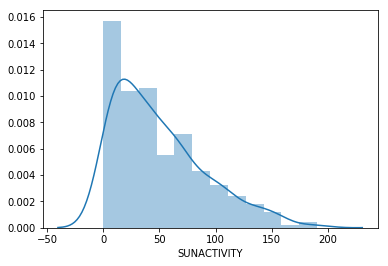

In [9]:
sns.distplot(df1['SUNACTIVITY'])

In [10]:
df1.describe()

,YEAR,SUNACTIVITY
count,309.000000,309.000000
mean,1854.000000,49.752104
std,89.344838,40.452595
min,1700.000000,0.000000
25%,1777.000000,16.000000
50%,1854.000000,40.000000
75%,1931.000000,69.800000
max,2008.000000,190.200000


In [11]:
#we are using sm dataset which yearwise
# preparing dataset

df1.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
df1.head()

,YEAR,SUNACTIVITY
1700-12-31,1700.0,5.0
1701-12-31,1701.0,11.0
1702-12-31,1702.0,16.0
1703-12-31,1703.0,23.0
1704-12-31,1704.0,36.0


In [12]:
#year was float so drop it
del df1["YEAR"]


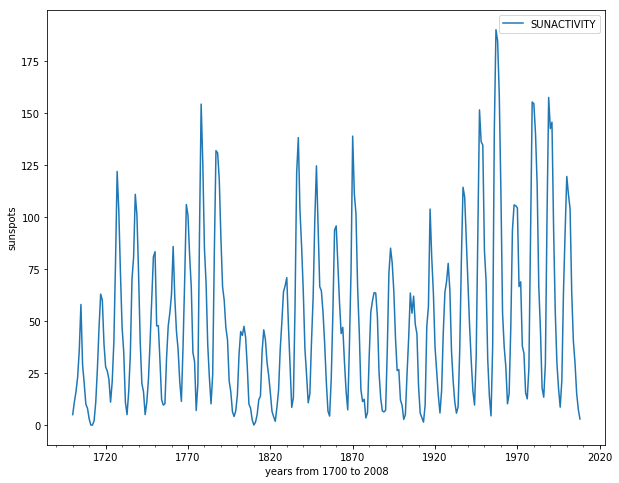

In [13]:
#now plot again
df1.plot(figsize=(10,8))
plt.xlabel('years from 1700 to 2008')
plt.ylabel('sunspots')

plt.show()

### 1. Checking for Sationarity?

    - 1. Plotting Rolling Statistics
    - 2. Deckey-Fuller Test
    - 3. KPSS Test
    
    Ref:https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/


 Checking Stationary

 Method 1. Plotting Rolling Stats


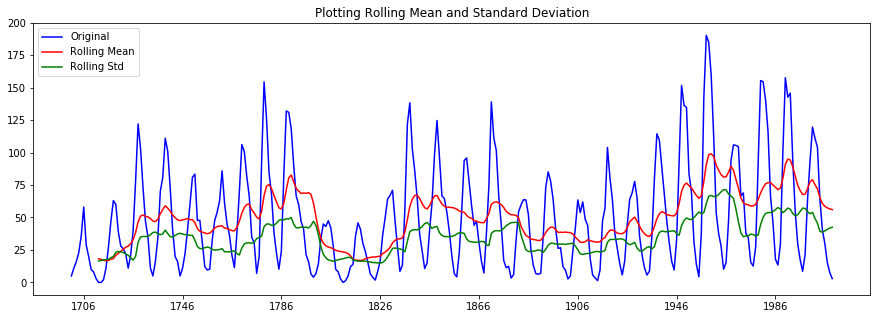


 Method 2. Dickey Fuller Test
Test Statistic               -2.837781
p-value                       0.053076
#lag-used                     8.000000
No. of Observations Used    300.000000
Critical Value 1%            -3.452337
Critical Value 5%            -2.871223
Critical Value 10%           -2.571929
dtype: float64

 Method 3. Kpss Test
Test Statistic            0.446646
p-value                   0.057049
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [14]:
from statsmodels.tsa.stattools import adfuller
print("\n Checking Stationary")

#method 1
def plot_roll_stats(timeseries):
    print("="*100)
    print("\n Method 1. Plotting Rolling Stats")
    print("="*100)
    roll_mean = timeseries.rolling(window=12).mean()
    roll_std = timeseries.rolling(window=12).std()
    #print(f'{roll_mean},  {roll_std}')
    
    plt.figure(figsize=(15,5))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(roll_mean, color='Red', label='Rolling Mean')
    plt.plot(roll_std, color='Green', label='Rolling Std')
    
    plt.title('Plotting Rolling Mean and Standard Deviation')
    plt.legend(loc='upper left')
    plt.show()
    
    
# method 2
def dickey_fuller_test(timeseries):
    print("="*100)
    print("\n Method 2. Dickey Fuller Test")
    print("="*100)
    
    #the test
    df_test= adfuller(timeseries)
    dfTestOut = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', '#lag-used', 'No. of Observations Used'])
    
    for key,value in df_test[4].items():
        dfTestOut[f'Critical Value {key}'] = value
    print(dfTestOut)
    
    
#method 3

from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print("="*100)
    print("\n Method 3. Kpss Test")
    print("="*100)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    
    
    
#calling both test functions   
plot_roll_stats(df1['SUNACTIVITY']) 
dickey_fuller_test(df1['SUNACTIVITY'])
kpss_test(df1['SUNACTIVITY'])

### Observations:

   **1. ADF(Augmented Dickey Fuller) test:** 

   - The Dickey Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test are:
               - Null Hypothesis: The series has a unit root (value of a =1)
               - Alternate Hypothesis: The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.

 **Results:** The ADF tests gives the following results – test statistic, p value and the critical value at 1%, 5% , and 10% confidence intervals. The results of our test for this particular series are: **In above case the test statistic < critical value , which implies that the series is stationary**
    
**Test for stationarity:** If the test statistic is less than the critical value, we can reject the null hypothesis (the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).

   **2. KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test:**
   - KPSS is another test for checking the stationarity of a time series (slightly less popular than the Dickey Fuller test). The null and alternate hypothesis for **the KPSS test are opposite that of the ADF test, which often creates confusion**.

The authors of the KPSS test have defined the null hypothesis as the process is trend stationary, to an alternate hypothesis of a unit root series.
             - Null Hypothesis: The process is trend stationary.
             - Alternate Hypothesis: The series has a unit root (series is not stationary).
             
  **Results of kpss:** Following are the results of the KPSS test – Test statistic, p-value, and the critical value at 1%, 2.5%,  5%, and 10% confidence intervals. here are the results: **statistic > critical value @ 10%, means stationary**
     

### 2. Checking for Auto-correlations and model selection

Before making model it is necessary to check

   - 1. Seasonal patterns of time series can be examined via correlograms, which display graphically and numerically the autocorrelation function (ACF)
   - 2. Another useful method to examine serial dependencies is to examine the partial autocorrelation function (PACF) – an extension of autocorrelation, where the dependence on the intermediate elements (those within the lag) is removed.

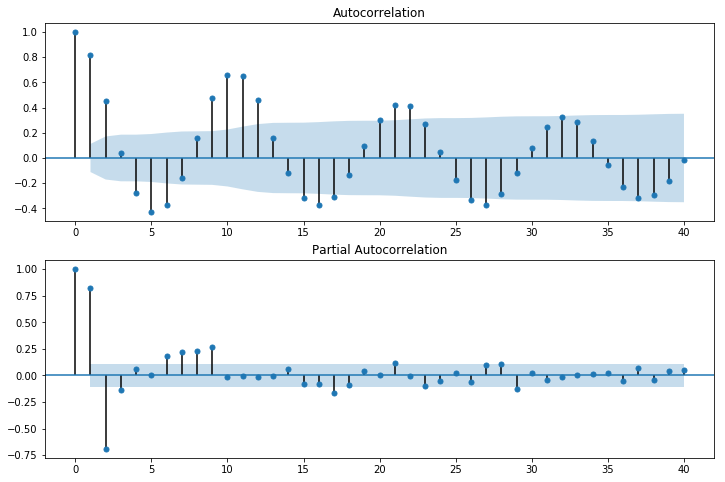

In [15]:
# Auto-correlation Function and Partial autocorrelation Function plot 
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1.values.squeeze(), lags=40, ax=ax2)

**Observation:**

Once we determine the nature of the auto-correlations we use the following rules of thumb.

Rule 1: If the ACF shows exponential decay, the PACF has a spike at lag 1, and no
correlation for other lags, then use one autoregressive (p)parameter

Rule 2: If the ACF shows a sine-wave shape pattern or a set of exponential decays, the
PACF has spikes at lags 1 and 2, and no correlation for other lags, the use two
autoregressive (p) parameters

Rule 3: If the ACF has a spike at lag 1, no correlation for other lags, and the PACF damps
out exponentially, then use one moving average (q) parameter.

Rule 4: If the ACF has spikes at lags 1 and 2, no correlation for other lags, and the PACF
has a sine-wave shape pattern or a set of exponential decays, then use two moving
average (q) parameter.

Rule 5: If the ACF shows exponential decay starting at lag 1, and the PACF shows
exponential decay starting at lag 1, then use one autoregressive (p) and one moving
average (q) parameter.

#### We have another set of plots available using the autocorrelation_plot function from Pandas.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


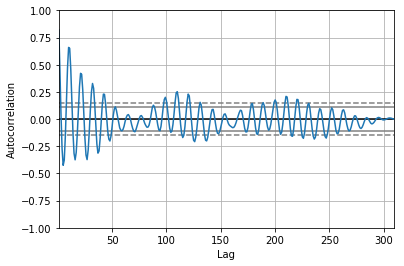

In [16]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(df1['SUNACTIVITY'])
plt.show()

### 3. Removing Serial Dependency

In [32]:
sm.stats.durbin_watson(df1['SUNACTIVITY'])

0.13952892659903304

**Observation:**

   - value below 2 means **positive autocorrelation**

### 4. Model Building

In [87]:
arma_mod20 = sm.tsa.ARMA(df1['SUNACTIVITY'], order=(2,0)).fit()
print(arma_mod20.params)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\s

const                49.659554
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64


In [88]:
#Our main goal is to choose a model which minimise Akaike Information Criterion (AIC), Schwarz Bayesian Information Criterion
#(BIC), and Hannan-Quinn Information Criterion (HQIC)
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

2622.636338066193 2637.5697031737836 2628.606725911439


In [89]:
#using DW stats to check autocorrelation in the model
sm.stats.durbin_watson(arma_mod20.resid.values)

2.145826901840096

**Observation:** DW stat is much closer to 2 means no autocorrelation

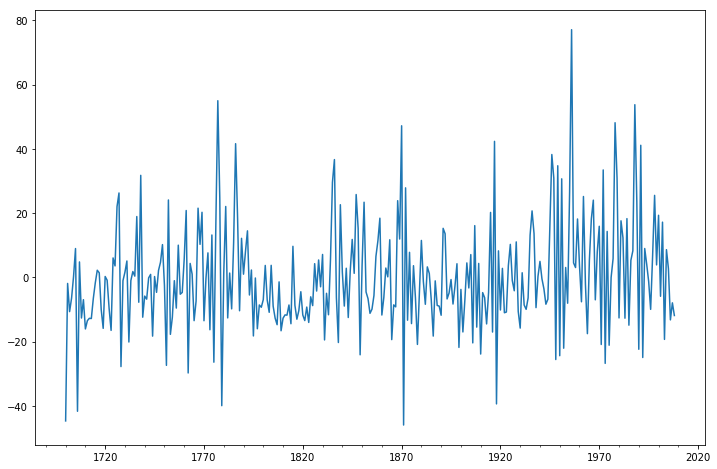

In [90]:
# Plotting Data
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod20.resid.plot(ax=ax);

### Analyzing the Residuals:
we calculate the residuals, tests the null hypothesis that the residuals come
from a normal distribution, and construct a qq-plot.

In [91]:
resid20 = arma_mod20.resid.values
stats.normaltest(resid20)

NormaltestResult(statistic=41.735978470764536, pvalue=8.652615927238322e-10)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


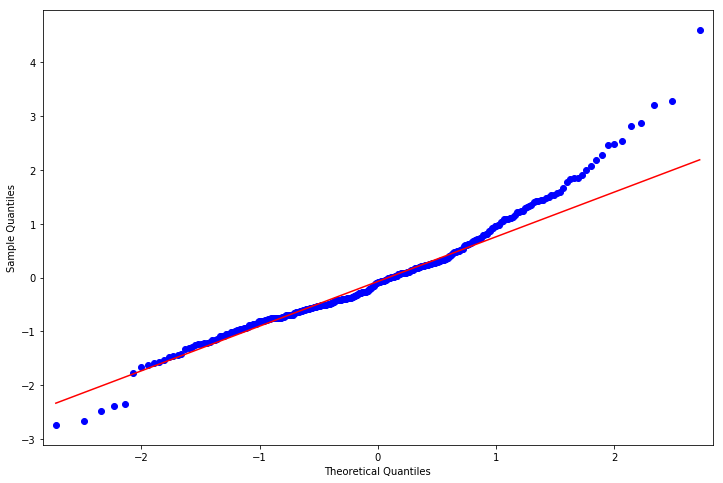

In [92]:
#plotting to compare the two distributions
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid20, line='q', ax=ax, fit=True)

### Checking Model Autocorrelation:

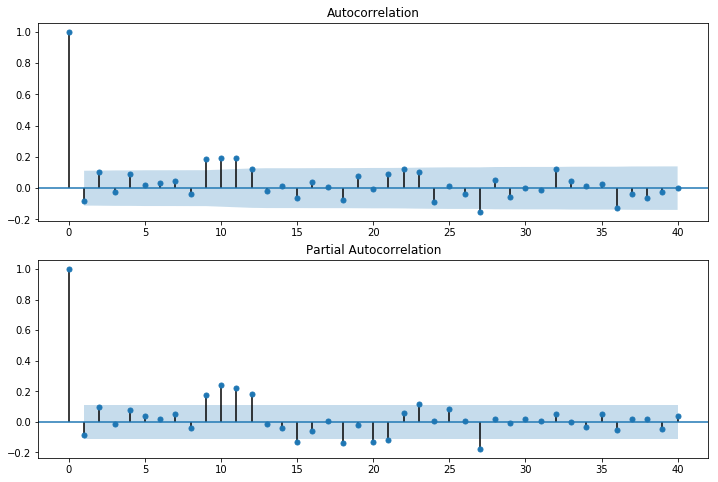

In [93]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid20.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid20, lags=40, ax=ax2)

In [94]:
r,q,p = sm.tsa.acf(resid20.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0  -0.085220   2.265967  0.132244
2.0   0.103691   5.631597  0.059857
3.0  -0.027833   5.874881  0.117859
4.0   0.091123   8.491077  0.075158
5.0   0.019010   8.605310  0.125881
6.0   0.031321   8.916436  0.178332
7.0   0.044485   9.546133  0.215785
8.0  -0.034337   9.922564  0.270503
9.0   0.185690  20.967735  0.012794
10.0  0.191608  32.767489  0.000298
11.0  0.190385  44.456229  0.000006
12.0  0.121693  49.247960  0.000002
13.0 -0.016219  49.333362  0.000004
14.0  0.014986  49.406524  0.000008
15.0 -0.063197  50.711971  0.000009
16.0  0.039730  51.229685  0.000015
17.0  0.009577  51.259868  0.000027
18.0 -0.073645  53.050927  0.000026
19.0  0.076469  54.988661  0.000023
20.0 -0.006827  55.004159  0.000041
21.0  0.088818  57.636422  0.000029
22.0  0.120485  62.497132  0.000009
23.0  0.103328  66.084641  0.000005
24.0 -0.085728  68.562758  0.000004
25.0  0.013730  68.626547  0.000006
26.0 -0.036183  69.071117  0

### Prediction

In [95]:
predict_sunspots20 = arma_mod20.predict('1990', '2012', dynamic=True)
print(predict_sunspots20)

1990-12-31    164.966862
1991-12-31    135.687644
1992-12-31     89.897721
1993-12-31     46.380527
1994-12-31     17.392712
1995-12-31      7.045328
1996-12-31     12.615854
1997-12-31     27.487447
1998-12-31     44.333012
1999-12-31     57.519242
2000-12-31     64.257378
2001-12-31     64.548148
2002-12-31     60.312821
2003-12-31     54.222725
2004-12-31     48.669821
2005-12-31     45.141108
2006-12-31     44.057453
2007-12-31     44.980232
2008-12-31     47.009673
2009-12-31     49.196529
2010-12-31     50.840277
2011-12-31     51.620359
2012-12-31     51.573348
Freq: A-DEC, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


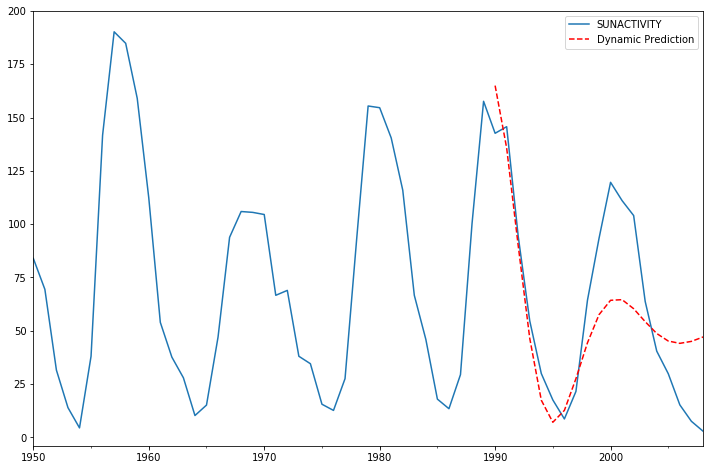

In [96]:
ax = df1.ix['1950':].plot(figsize=(12,8))
ax = predict_sunspots20.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));

The fit looks good up to about 1998 and underfit the data afterwards.

### Errors Calculation

In [85]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()
def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error

In [97]:
print("MFE = ", mean_forecast_err(df1.SUNACTIVITY, predict_sunspots20))
print("MAE = ", mean_absolute_err(df1.SUNACTIVITY, predict_sunspots20))

MFE =  4.730225928780894
MAE =  0.13468268969371655


**Observation:** For MFE > 0, models tends to under-forecast. However, as long as the tracking signal is between –
4 and 4, we assume the model is working correctly. The measure of MAE being small would
indicate a pretty good fit.

## ARIMA Model

In [99]:
from statsmodels.tsa.arima_model import ARIMA
arima_1 = ARIMA(df1['SUNACTIVITY'], order=(2,1,2))

result = arima_1.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


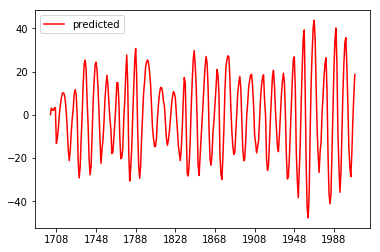

In [100]:
plt.plot(result.fittedvalues, color='red', label='predicted')
plt.legend()
plt.show()

Ref:
    1. https://www.quantstart.com/articles/Autoregressive-Moving-Average-ARMA-p-q-Models-for-Time-Series-Analysis-Part-1
    2. https://www.quantstart.com/articles/Autoregressive-Moving-Average-ARMA-p-q-Models-for-Time-Series-Analysis-Part-2
    3. https://www.quantstart.com/articles/Autoregressive-Moving-Average-ARMA-p-q-Models-for-Time-Series-Analysis-Part-3
    4. https://stackoverflow.com/questions/37671744/how-to-decide-p-of-acf-and-q-of-pacf-in-ar-ma-arma-and-arima
    Identifying the orders of AR and MA terms in an ARIMA model

https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

Course on Analytics Vidya: https://courses.analyticsvidhya.com/courses/take/creating-time-series-forecast-using-python/texts/6133008-components-of-a-time-series